# Nonparametric methods

## Comparing and contrasting


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/ramesh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
N_test = 500
N_train = 150

np.random.seed(2021)

# Create a training dataset
x1_train = np.random.uniform(-1, 1, N_train)
x2_train = np.random.uniform(-1, 1, N_train)

y_train = (x1_train * x2_train > 0).astype(np.int64)

# Create a feature matrix that we can use for classification
X_train = np.vstack([x1_train, x2_train]).transpose()


# Create a test dataset
x1_test = np.random.uniform(-3, 3, N_test)
x2_test = np.random.uniform(-3, 3, N_test)

y_test = (x1_test * x2_test > 0).astype(np.int64)

# Create a feature matrix that we can use to evaluate
X_test = np.vstack([x1_test, x2_test]).transpose()

def draw_results(x1, x2, color, plot_title=''):
    plt.figure()
    plt.scatter(x1, x2, c=color, cmap='viridis', alpha=0.7);
    plt.colorbar()
    plt.title(plot_title)
    plt.axis('equal')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.tight_layout()

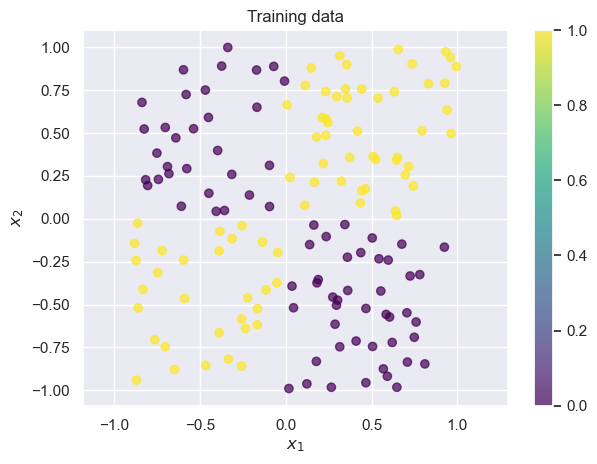

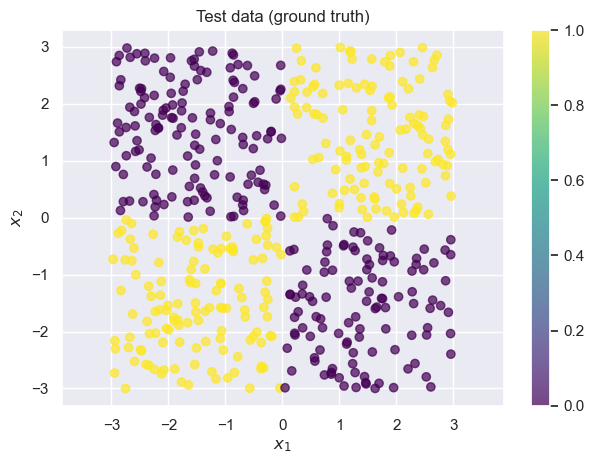

In [3]:
draw_results(x1_train, x2_train, color=y_train, plot_title='Training data')
draw_results(x1_test, x2_test, color=y_test, plot_title='Test data (ground truth)')

### Logistic regression

Let $p$ be our predicted probability that $y$ is 1 based on $x_1$ and $x_2$. Then logistic regression says:

$$
p = \sigma(\beta_1 x_1 + \beta_2 x_2) \\
\underbrace{\log\left(\frac{p}{1-p}\right)}_{\text{logit: inverse sigmoid}} = \beta_1 x_1 + \beta_2 x_2
$$

/Users/ramesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy on test set: 0.492


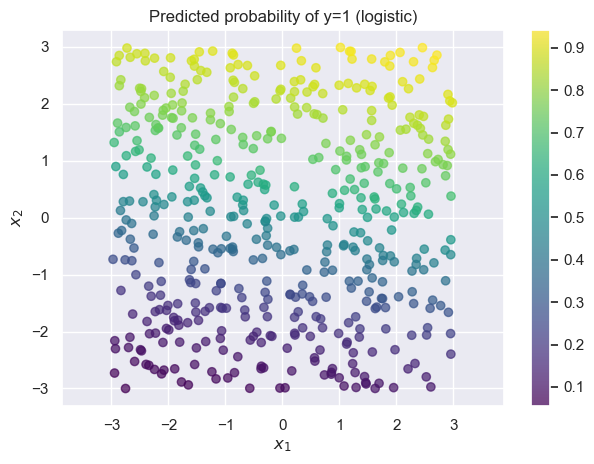

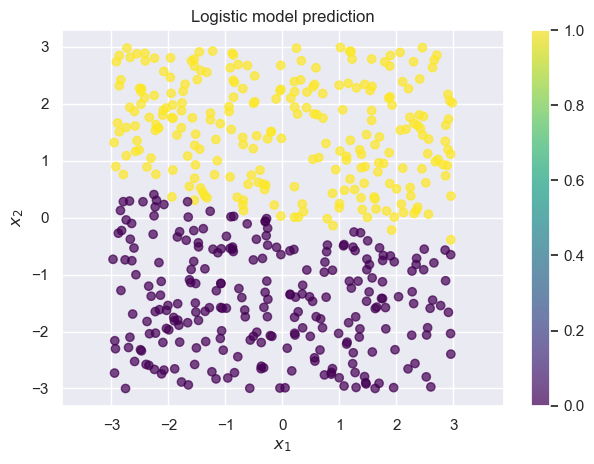

In [4]:
from sklearn.linear_model import LogisticRegression

# Create and fit a scikit-learn logistic regression model on training set
model_logistic = LogisticRegression(penalty='none', solver='lbfgs')
model_logistic.fit(X_train, y_train)

# Use the model to predict on the test set
probs_logistic = model_logistic.predict_proba(X_test)[:, 1]
y_hat_logistic = (probs_logistic > 0.5).astype(np.int64)


# Visualize the results
draw_results(
    x1_test, x2_test, color=probs_logistic, 
    plot_title="Predicted probability of y=1 (logistic)"
)

draw_results(
    x1_test, x2_test, color=y_hat_logistic, 
    plot_title="Logistic model prediction"
)

accuracy = np.mean(y_test == y_hat_logistic)
print(f"Accuracy on test set: {accuracy}")

### $k$-Nearest Neighbor Classifier

Recall that a $k$-nearest neighbor classifier classifies each point based on the label of the $k$ nearest points in the training set.

Accuracy on test set: 0.95


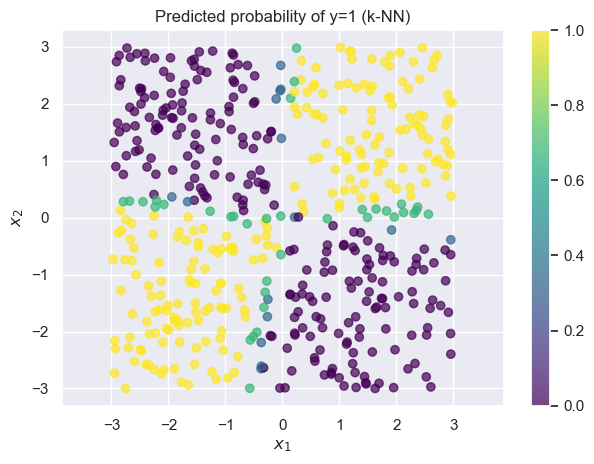

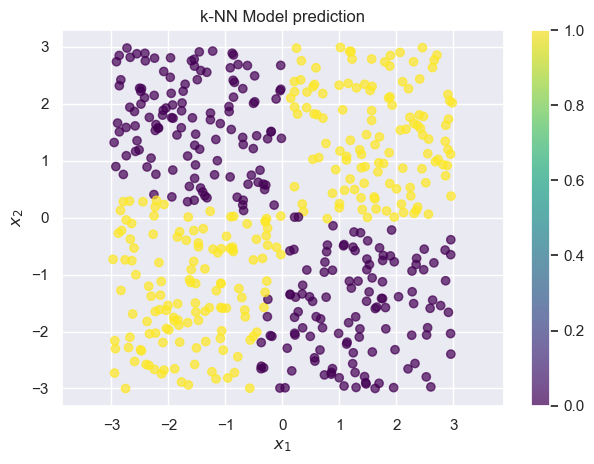

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

probs_knn = model_knn.predict_proba(X_test)[:, 1]
y_hat_knn = (probs_knn > 0.5).astype(np.int64)


draw_results(
    x1_test, x2_test, color=probs_knn, 
    plot_title="Predicted probability of y=1 (k-NN)"
)

draw_results(
    x1_test, x2_test, color=y_hat_knn, 
    plot_title="k-NN Model prediction"
)

accuracy = np.mean(y_test == y_hat_knn)
print(f"Accuracy on test set: {accuracy}")

## Decision trees and random forests

### Decision trees

![](tree_small2.jpeg)

To predict the $y$-value for a new point, we start at the root (top), and continue down until we reach a leaf node. This tree ended up very symmetric, but in many problems that won't be the case.

Here's how it works in scikit-learn:



Accuracy on test set: 0.996


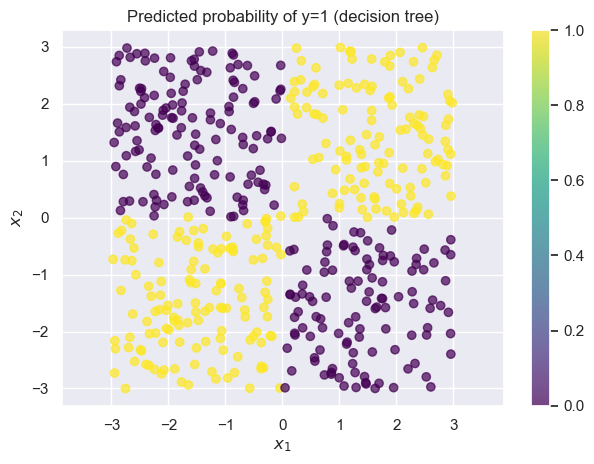

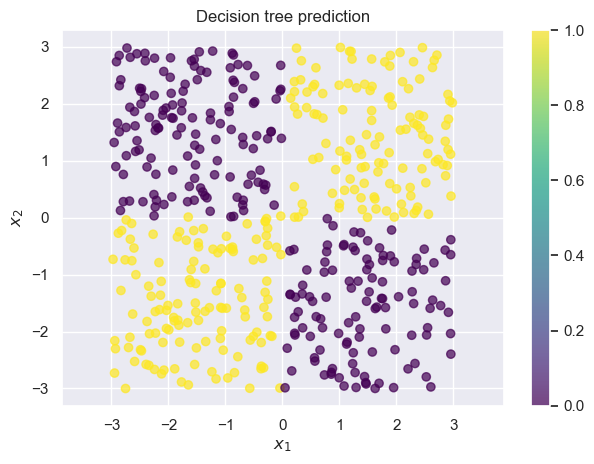

In [6]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

probs_tree = model_tree.predict_proba(X_test)[:, 1]
y_hat_tree = (probs_tree > 0.5).astype(np.int64)


draw_results(
    x1_test, x2_test, color=probs_tree, 
    plot_title="Predicted probability of y=1 (decision tree)"
)

draw_results(
    x1_test, x2_test, color=y_hat_tree, 
    plot_title="Decision tree prediction"
)

accuracy = np.mean(y_test == y_hat_tree)
print(f"Accuracy on test set: {accuracy}")

The decision tree is almost perfect (we'll take a closer look at its mistakes later).

### From decision trees to random forests

Small decision trees work great for problems where the underlying structure is simple. But what if we our data are noisier? Let's randomly flip a few data points ($10\%$ of our training data) and see what happens:

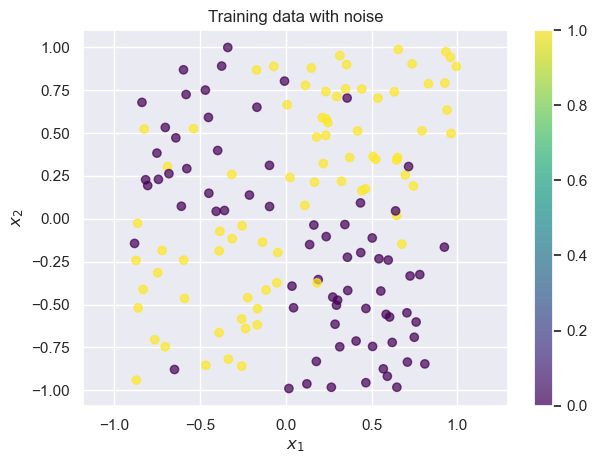

In [7]:
y_train_noisy = y_train.copy()

pts_to_flip = np.random.random(N_train) < 0.1
y_train_noisy[pts_to_flip] = 1 - y_train_noisy[pts_to_flip]

draw_results(x1_train, x2_train, color=y_train_noisy, plot_title='Training data with noise')

Now there are a small handful of points where the training label is wrong. Let's try fitting a decision tree again: we'll train on the noisy data, but we'll test on the good data.

Accuracy on training set: 0.776


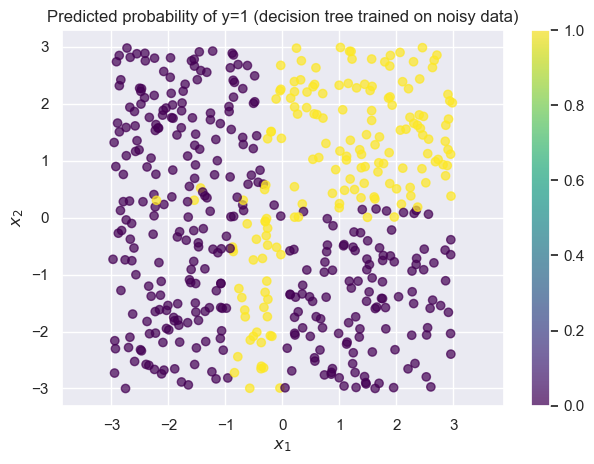

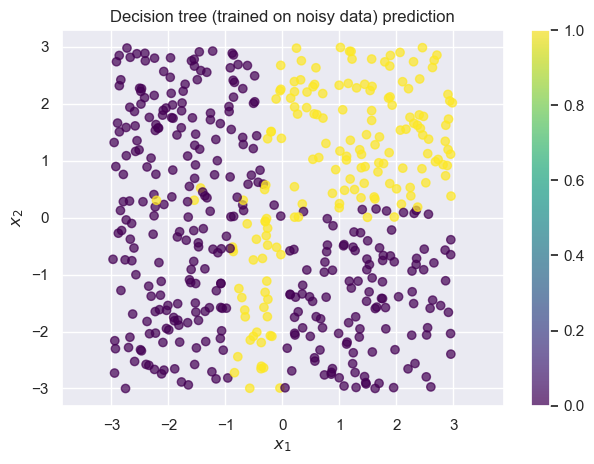

In [8]:
from sklearn.tree import DecisionTreeClassifier

model_noisytree = DecisionTreeClassifier()
model_noisytree.fit(X_train, y_train_noisy)

probs_noisytree = model_noisytree.predict_proba(X_test)[:, 1]
y_hat_noisytree = (probs_noisytree > 0.5).astype(np.int64)


draw_results(
    x1_test, x2_test, color=probs_noisytree, 
    plot_title="Predicted probability of y=1 (decision tree trained on noisy data)"
)

draw_results(
    x1_test, x2_test, color=y_hat_noisytree, 
    plot_title="Decision tree (trained on noisy data) prediction"
)

accuracy = np.mean(y_test == y_hat_noisytree)
print(f"Accuracy on training set: {accuracy}")

Changing just $10\%$ of the points completely wrecked the tree! Our accuracy dropped to around $75\%$. While this is a toy dataset, it's fairly common in real-world datasets to see $10\%$ of the data be corrupted by noise. 

We'll fix this using a whole bunch of trees instead of just one. We'll train lots and lots of trees (usually at least 100). Ideally, we would get a fresh dataset for each one, and train each tree separately. Unfortunately, we usually can't get 100 separate datasets, and if we divide our training dataset into 100, we're losing out on valuable data we could use to train our trees.

But, we've already seen a way around this: we can use the bootstrap! Notice that here, we're using bootstrap for a completely different purpose than before: instead of using it to quantify uncertainty, we're using it to improve accuracy. This is called **Bootstrap AGGregation**, or **bagging**. 

The second big idea is **random feature selection**. In this toy example, we've been working with 2 features $x_1$ and $x_2$. But in many real problems, you may have hundreds or even thousands of features. Using the algorithm we have above, for a decision tree to properly deal with that many features, it would have to be extremely deep (since we'd need one node/split for every feature that's relevant). Since we're using multiple trees, we don't need each tree to be perfect. So, we'll just choose a subset of the features for each tree.

In practice, for $K$ features, people use $K/3$ features per tree for **regression** and $\sqrt{K}$ features per tree for **classification**.

So, here's how the random forest algorithm works: we train a large number of trees independently, where each one is trained on a bootstrap sample of the data and on a smaller number of features. 

Accuracy on test set: 0.936


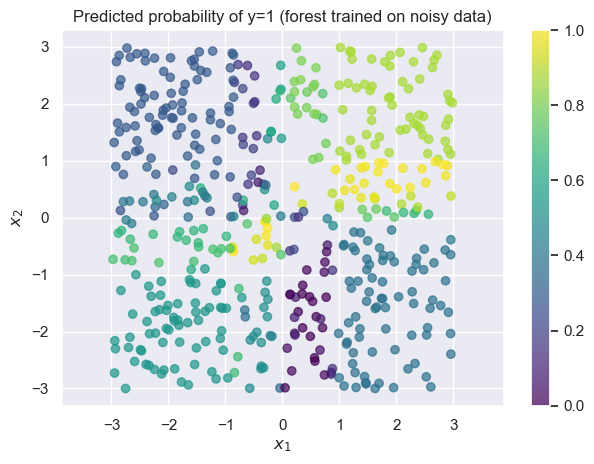

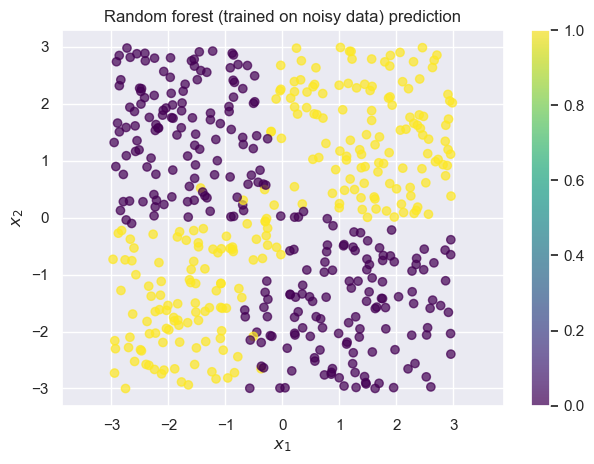

In [9]:

from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train_noisy)

probs_forest = model_forest.predict_proba(X_test)[:, 1]
y_hat_forest = (probs_forest > 0.5).astype(np.int64)


draw_results(
    x1_test, x2_test, color=probs_forest, 
    plot_title="Predicted probability of y=1 (forest trained on noisy data)"
)

draw_results(
    x1_test, x2_test, color=y_hat_forest, 
    plot_title="Random forest (trained on noisy data) prediction"
)

accuracy = np.mean(y_test == y_hat_forest)
print(f"Accuracy on test set: {accuracy}")

There are a lot of important details that we haven't covered here. Some of these (e.g., choosing the number of trees) are hyperparameters that we have to decide on using something like cross-validation, while others (e.g., how we decide the best place to split at each iteration while building a tree) are an important part of the algorithm that's beyond what we'll cover in this class. 

## Interpretability

How do we interpret the models we've developed? Let's look at the results we already computed before, but now we'll also interpret the models themselves.

#### Logistic regression

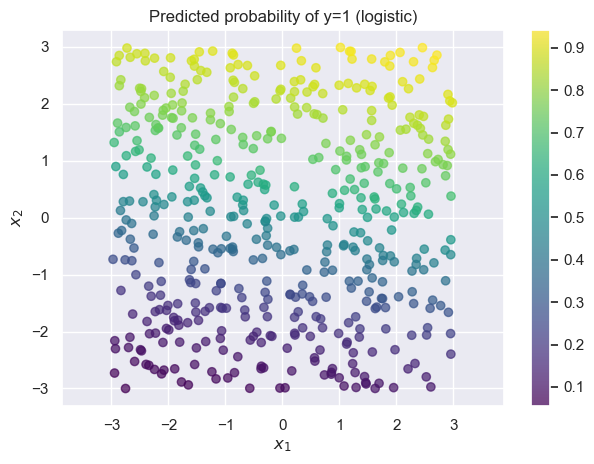

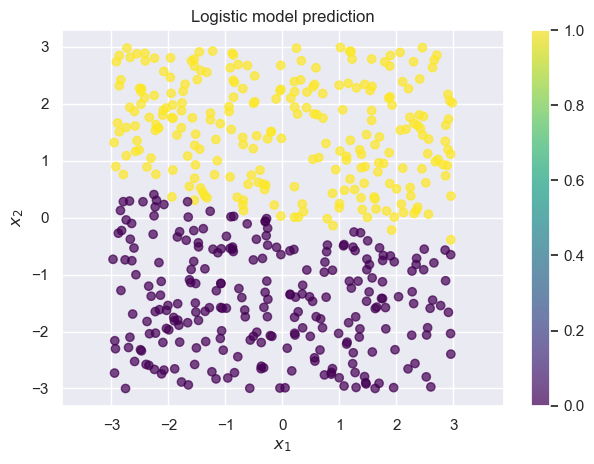

In [10]:
# Visualize the results
draw_results(
    x1_test, x2_test, color=probs_logistic, 
    plot_title="Predicted probability of y=1 (logistic)"
)

draw_results(
    x1_test, x2_test, color=y_hat_logistic, 
    plot_title="Logistic model prediction"
)

In [11]:
model_logistic.coef_

array([[0.14617069, 0.80642215]])

#### Logistic regression with feature engineering

/Users/ramesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


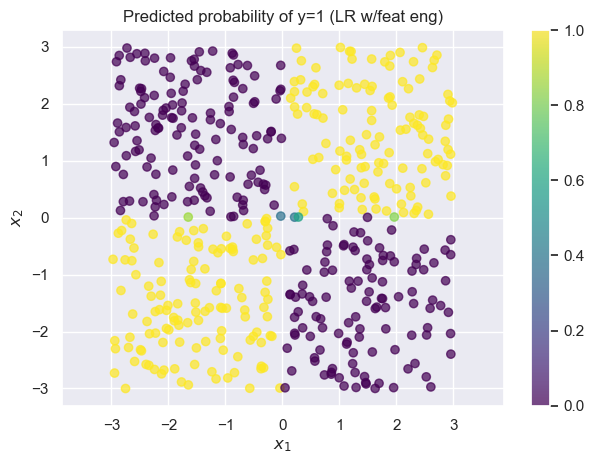

In [12]:
from sklearn.linear_model import LogisticRegression
# Create a new feature: x1 * x2
def add_mult_feature(X):
    """Returns an array like X, but with a new feature that's X1 * X2"""
    new_feature = X[:, 0] * X[:, 1]
    return np.hstack([X, new_feature[:, None]])


X_train_feat = add_mult_feature(X_train)
X_test_feat = add_mult_feature(X_test)

# Create and fit a scikit-learn logistic regression model on training set
model_logistic_feat_eng = LogisticRegression(penalty='none', solver='lbfgs')

model_logistic_feat_eng.fit(X_train_feat, y_train)

# Use the model to predict on the test set
probs_logistic_feat_eng = model_logistic_feat_eng.predict_proba(X_test_feat)[:, 1]
y_hat_logistic_feat_eng = (probs_logistic_feat_eng > 0.5).astype(np.int64)


# Visualize the results
draw_results(
    x1_test, x2_test, color=probs_logistic_feat_eng, 
    plot_title="Predicted probability of y=1 (LR w/feat eng)"
)

In [13]:
model_logistic_feat_eng.coef_

array([[ -15.7502901 ,    1.76614945, 1720.58615787]])

#### k-NN

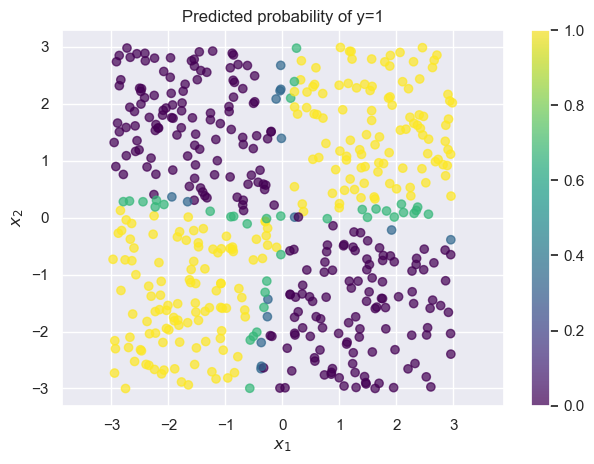

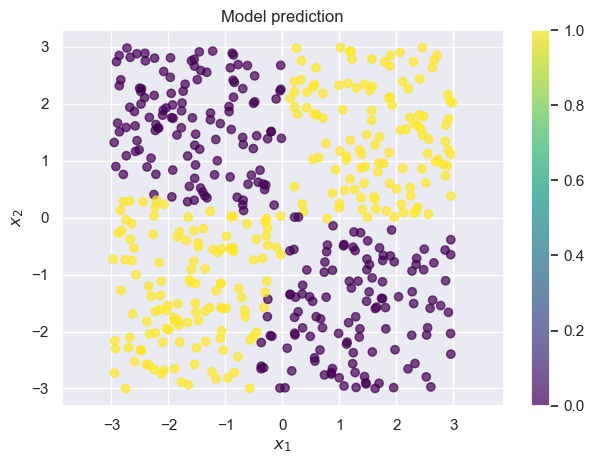

In [14]:
draw_results(
    x1_test, x2_test, color=probs_knn, 
    plot_title="Predicted probability of y=1"
)

draw_results(
    x1_test, x2_test, color=y_hat_knn, 
    plot_title="Model prediction"
)

#### Decision tree

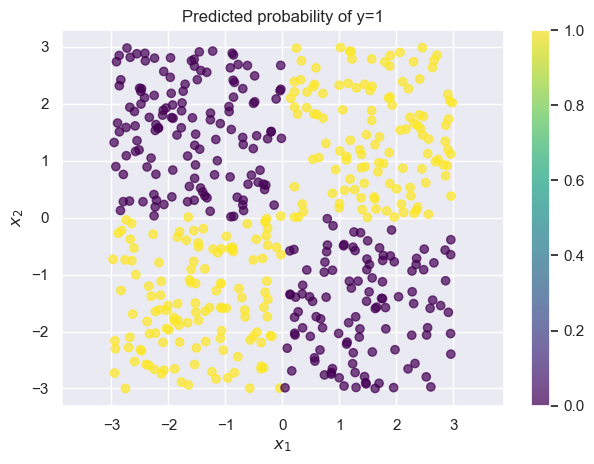

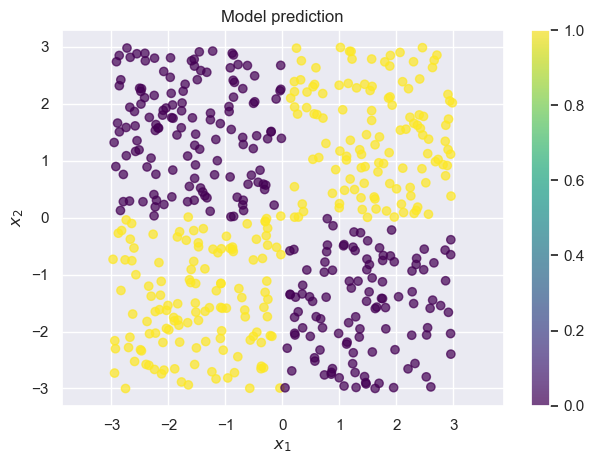

In [15]:
draw_results(
    x1_test, x2_test, color=probs_tree, 
    plot_title="Predicted probability of y=1"
)

draw_results(
    x1_test, x2_test, color=y_hat_tree, 
    plot_title="Model prediction"
)


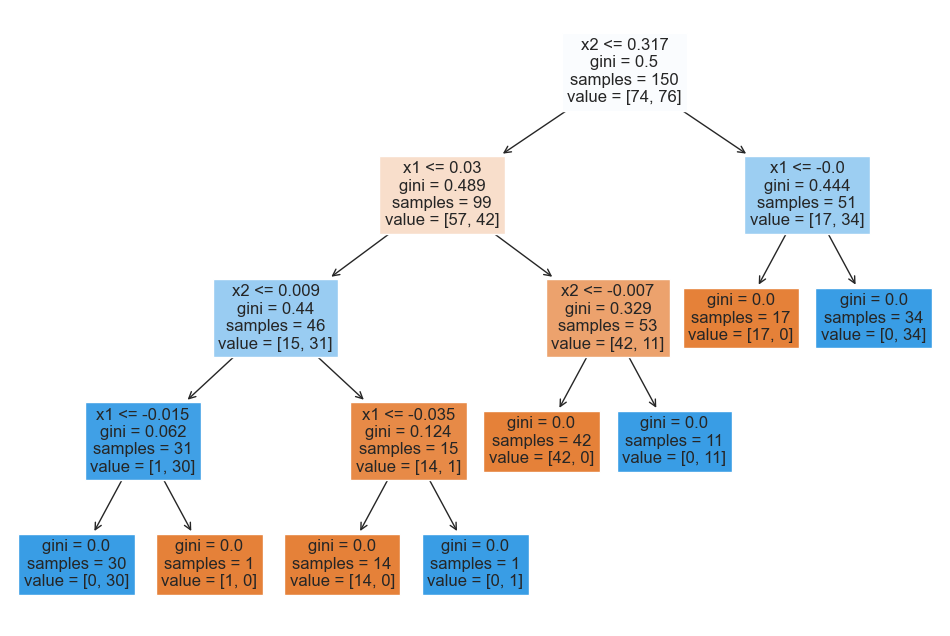

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model_tree, fontsize=12, filled=True, feature_names=['x1', 'x2']);

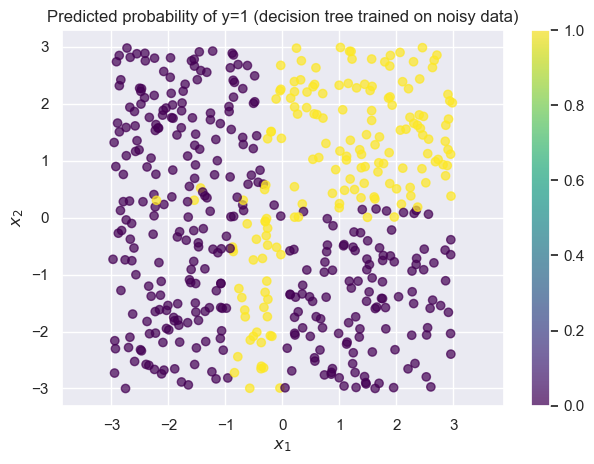

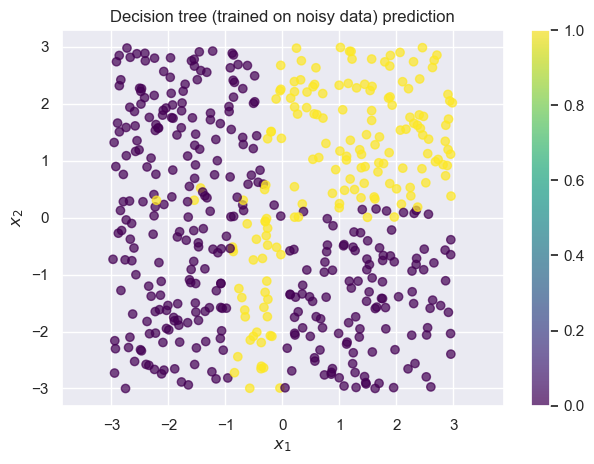

In [17]:

draw_results(
    x1_test, x2_test, color=probs_noisytree, 
    plot_title="Predicted probability of y=1 (decision tree trained on noisy data)"
)

draw_results(
    x1_test, x2_test, color=y_hat_noisytree, 
    plot_title="Decision tree (trained on noisy data) prediction"
)


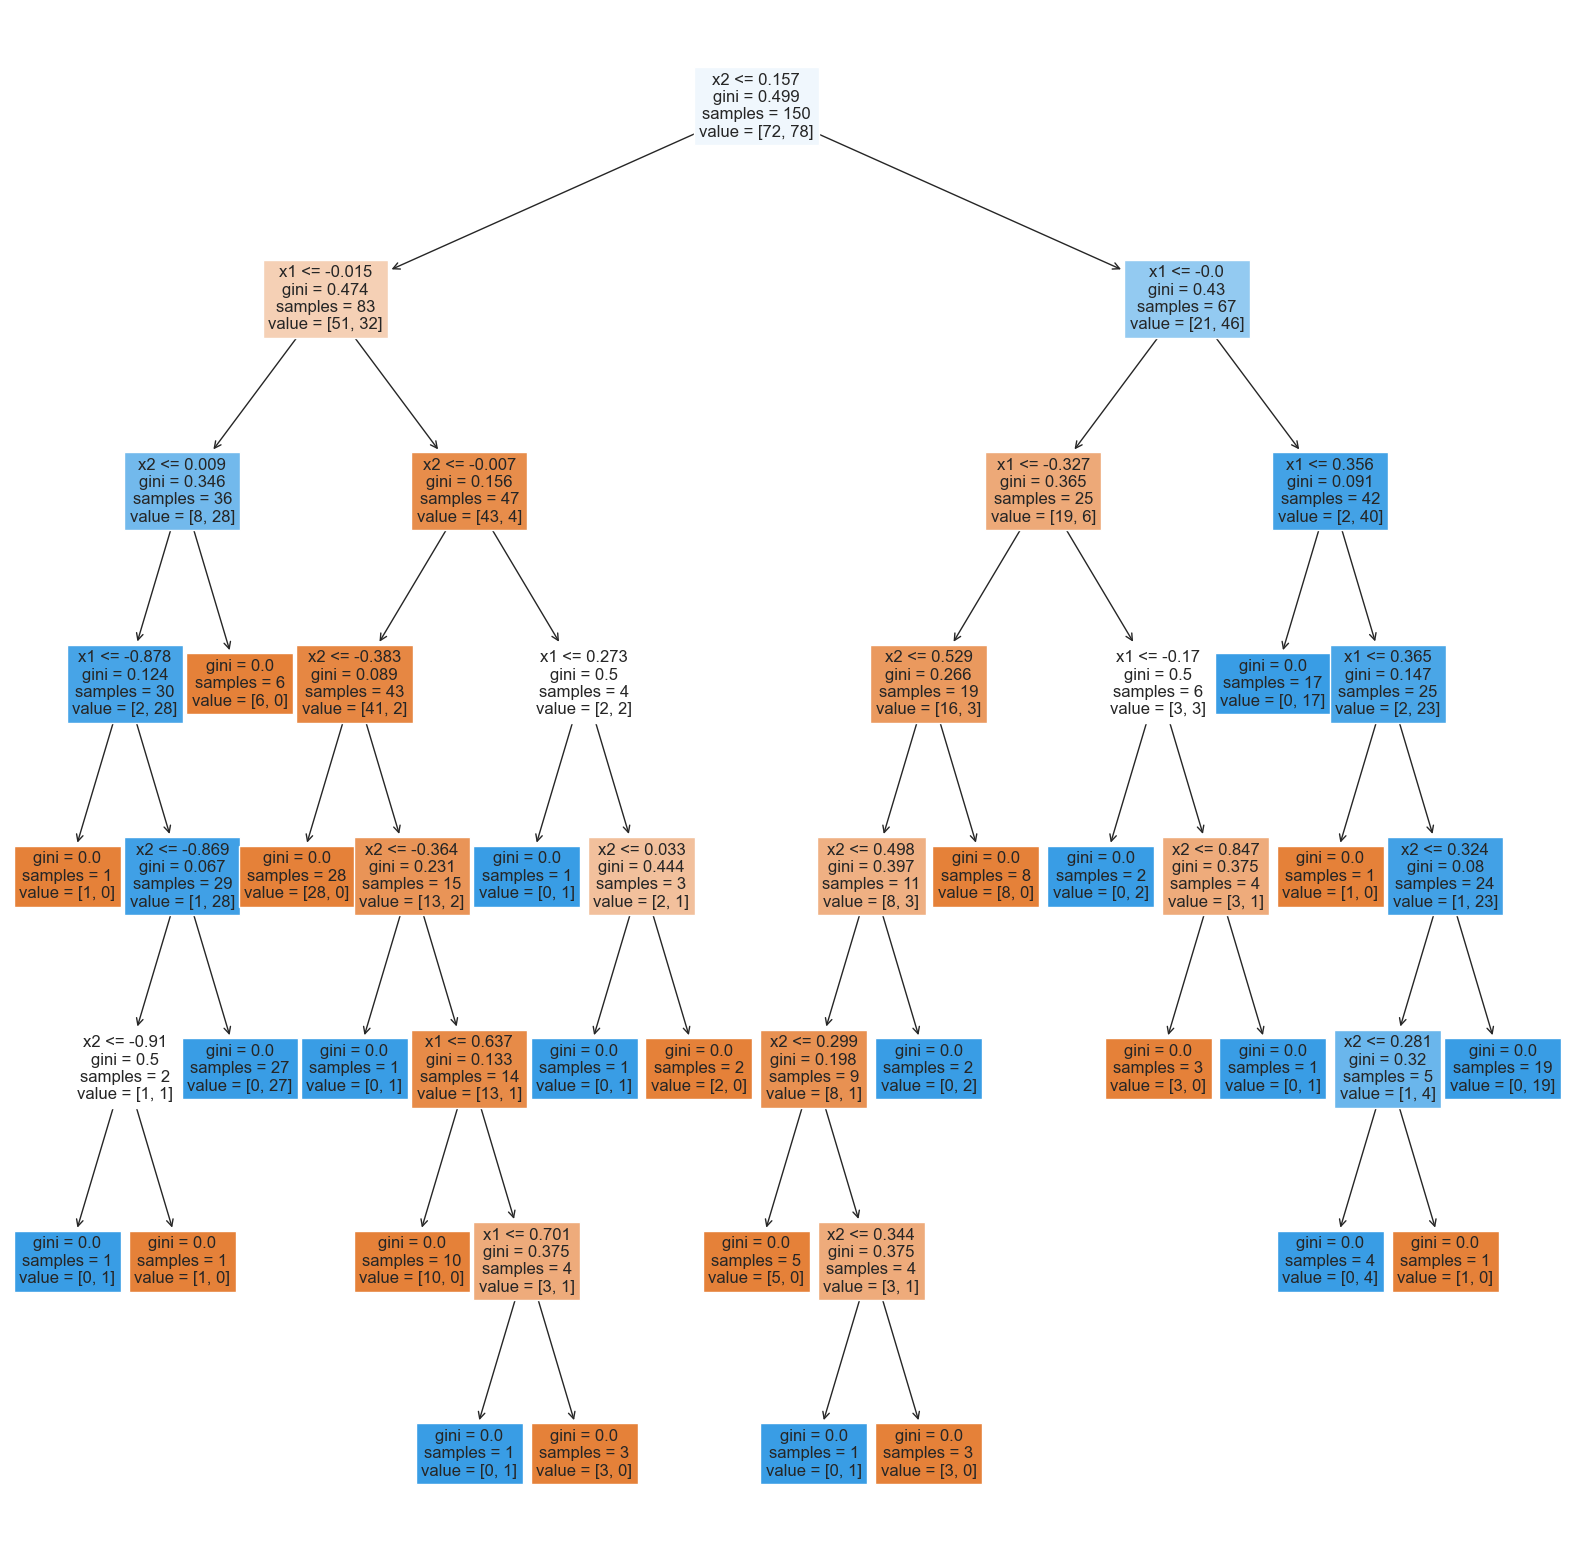

In [18]:

plt.figure(figsize=(20, 20))
plot_tree(
    model_noisytree,
    fontsize=12, 
    filled=True, 
    feature_names=['x1', 'x2']
);